In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ! unzip '/content/drive/MyDrive/project_4/train.zip' -d '/content/drive/MyDrive/project_4/'

unzip:  cannot find or open /content/drive/MyDrive/project_4/train.zip, /content/drive/MyDrive/project_4/train.zip.zip or /content/drive/MyDrive/project_4/train.zip.ZIP.


In [15]:
import numpy as np
import pandas as pd


In [8]:
import os

files = os.listdir('/content/drive/MyDrive/project_$/train')

import librosa

featurs = []
y = []
i = 1
for file in files: 
  print(i, file)
  i += 1
  path, sr = librosa.load('/content/drive/MyDrive/project_4/train/' + file)
  feature = librosa.feature.mfcc(y=path, sr=sr,n_mfcc=15)
  featurs.append(feature)
  y = file.split('.')[0][-1]

1 2387FN.wav
2 1506MN.wav
3 0951FA.wav
4 1461FA.wav
5 1625FS.wav
6 1161MW.wav
7 2050MN.wav
8 1495FA.wav
9 0238MH.wav
10 0703MA.wav
11 1174MA.wav
12 1424MS.wav
13 0400FN.wav
14 2028MA.wav
15 0936MA.wav
16 1253MN.wav
17 1390FN.wav
18 1670FA.wav
19 0595MH.wav
20 1494FA.wav
21 1455FH.wav
22 2112MN.wav
23 1278MS.wav
24 2543MS.wav
25 0782MW.wav
26 1624MA.wav
27 2127MA.wav
28 0441MW.wav
29 1572FW.wav
30 0297MH.wav
31 0169MN.wav
32 0363FA.wav
33 0495FA.wav
34 0712FH.wav
35 2107FS.wav
36 1902MN.wav
37 0062MA.wav
38 1165MA.wav
39 2393FS.wav
40 0612MN.wav
41 0445FN.wav
42 1449FA.wav
43 0053MN.wav
44 1813MN.wav
45 0104FA.wav
46 2316MS.wav
47 2652FS.wav
48 2509FA.wav
49 0928FN.wav
50 1999MS.wav
51 2569FA.wav
52 2120MN.wav
53 1973MH.wav
54 2394MA.wav
55 1992MN.wav
56 1870MN.wav
57 1732MW.wav
58 0450MH.wav
59 1701MN.wav
60 1946MS.wav
61 2362FN.wav
62 1428MN.wav
63 1928MA.wav
64 0194MA.wav
65 2301MA.wav
66 2081MA.wav
67 1795MA.wav
68 1619MN.wav
69 2626FN.wav
70 1179MN.wav
71 1738FN.wav
72 0189MN.wav
7

In [13]:
avr = 0
print(featurs[0].shape)
for i in featurs:
  avr += i.shape[1]

avr /= 1994
avr = int(avr)

(15, 345)


In [18]:
x = []
for i in featurs:
  temp = np.zeros((avr, 15))
  temp[0:i.T.shape[0], :] = i.T[0:avr, :]

  x.append(temp)

In [24]:
 x = np.array(x)
x.shape

(1994, 180, 15)

In [35]:
from keras.utils import to_categorical

classes = {'N': 0, 'A': 1, 'S': 2, 'W': 3, 'H': 4}
y = np.array(y)

for i in range(len(y)):
  y[i] = classes[y[i]]

y = to_categorical(y)

y


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = []
for i in x:
  X.append(sc.fit_transform(i))

In [39]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, train_size=0.8, shuffle=True)


In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn import metrics 

model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(None, 15)))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(5, activation='softmax', name='output'))
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                20480     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 5)                 165       
Total params: 37,253
Trainable params: 37,253
Non-trainable params: 0
_________________________________________________________________
None


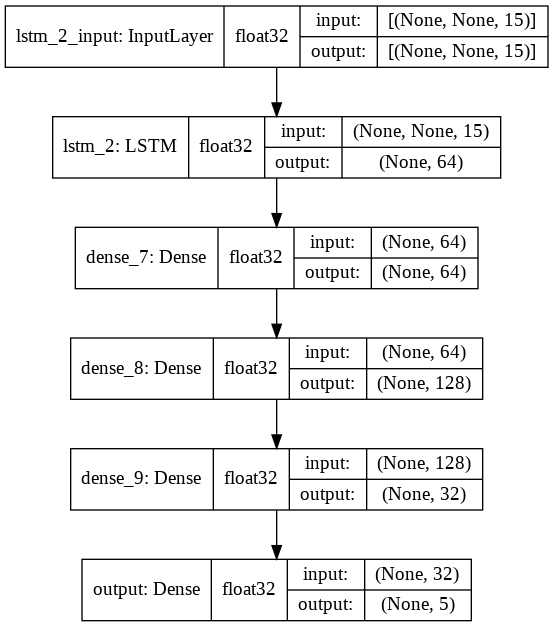

In [49]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_dtype=True)

In [50]:
history=model.fit(np.array(Xtrain), np.array(Ytrain), batch_size=128, epochs=100, validation_data=(np.array(Xtest), np.array(Ytest)))


Epoch 1/100
13/13 [==============================] - 9s 56ms/step - loss: 0.1594 - accuracy: 0.3204 - val_loss: 0.1586 - val_accuracy: 0.3333
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 0.1588 - accuracy: 0.3354 - val_loss: 0.1583 - val_accuracy: 0.3308
Epoch 3/100
13/13 [==============================] - 0s 28ms/step - loss: 0.1586 - accuracy: 0.3342 - val_loss: 0.1581 - val_accuracy: 0.3434
Epoch 4/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1584 - accuracy: 0.3288 - val_loss: 0.1578 - val_accuracy: 0.3409
Epoch 5/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1581 - accuracy: 0.3375 - val_loss: 0.1575 - val_accuracy: 0.3383
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 0.1579 - accuracy: 0.3322 - val_loss: 0.1572 - val_accuracy: 0.3434
Epoch 7/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1575 - accuracy: 0.3287 - val_loss: 0.1570 - val_accuracy: 0.3434
Epoch 

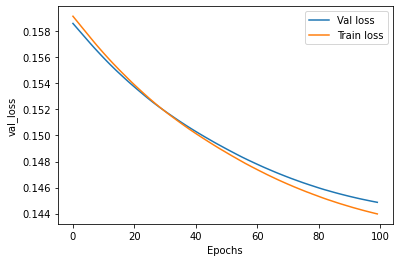

In [52]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


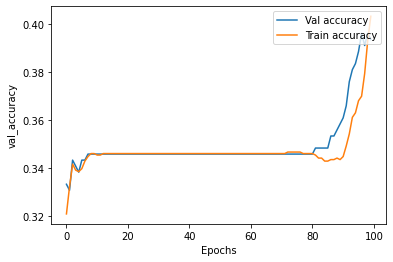

In [53]:
val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig('plot_accuracy.png')
plt.show()


In [54]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [55]:
history=model.fit(np.array(Xtrain), np.array(Ytrain), batch_size=128, epochs=100, validation_data=(np.array(Xtest), np.array(Ytest)))


Epoch 1/100
13/13 [==============================] - 2s 53ms/step - loss: 0.1436 - accuracy: 0.3639 - val_loss: 0.1420 - val_accuracy: 0.3860
Epoch 2/100
13/13 [==============================] - 0s 32ms/step - loss: 0.1403 - accuracy: 0.4182 - val_loss: 0.1419 - val_accuracy: 0.3910
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.1355 - accuracy: 0.4504 - val_loss: 0.1361 - val_accuracy: 0.4762
Epoch 4/100
13/13 [==============================] - 0s 15ms/step - loss: 0.1325 - accuracy: 0.4955 - val_loss: 0.1322 - val_accuracy: 0.4737
Epoch 5/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1262 - accuracy: 0.5184 - val_loss: 0.1284 - val_accuracy: 0.5163
Epoch 6/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1230 - accuracy: 0.5348 - val_loss: 0.1271 - val_accuracy: 0.4962
Epoch 7/100
13/13 [==============================] - 0s 15ms/step - loss: 0.1245 - accuracy: 0.5321 - val_loss: 0.1278 - val_accuracy: 0.4687
Epoch 

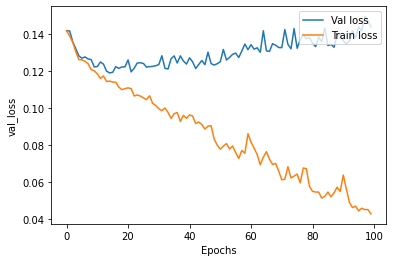

In [57]:
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


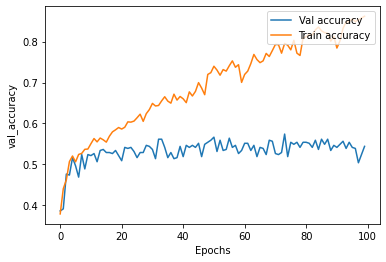

In [56]:
val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig('plot_accuracy.png')
plt.show()
